In [57]:
import pandas as pd
import numpy as np
import phik
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation
from statsmodels.stats.proportion import proportions_ztest 

#upload CSV file
file_path = 'C:\capstoneproject2\Supermarketcustomers.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\581627164.py:10: SyntaxWarning: invalid escape sequence '\c'
  file_path = 'C:\capstoneproject2\Supermarketcustomers.csv'


In [58]:
# To check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [59]:
# Find the minimum and maximum ID (excluding the zero IDs)
min_id = df[df['ID'] != 0]['ID'].min()
max_id = df[df['ID'] != 0]['ID'].max()

# Replace 0 IDs with a random number between min_id and max_id
df['ID'] = df['ID'].apply(lambda x: np.random.randint(min_id, max_id+1) if x == 0 else x)

# Save the updated DataFrame to a CSV file (optional)
df.to_csv('updated_dataset_1.csv', index=False)

# Print the first few rows to verify the changes
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [60]:
# Updated dataset
new_filepath_1 = 'C:\\capstoneproject2\\updated_dataset_1.csv'
df = pd.read_csv(new_filepath_1)

# Create a DataFrame with no missing values in the 'Income' column
df_no_missing = df[df['Income'].notna()]

# Create a DataFrame with missing values in the 'Income' column
df_missing = df[df['Income'].isna()]

# Print the shape of the DataFrames to verify the split
print("DataFrame with no missing values in 'Income':")
print(df_no_missing.shape)

print("\nDataFrame with missing values in 'Income':")
print(df_missing.shape)

DataFrame with no missing values in 'Income':
(2216, 29)

DataFrame with missing values in 'Income':
(24, 29)


In [61]:
# Drop rows with missing values in the 'Income' column
df_no_missing = df[df['Income'].notna()]

# Define the quantiles
quantiles = [0, 0.25, 0.5, 0.75, 1]

# Create labels for the quantiles
labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Assign quantile labels to each row in the DataFrame
df_no_missing['Income_Quantile'] = pd.qcut(df_no_missing['Income'], q=quantiles, labels=labels)

# Separate the DataFrame based on the quantiles
quantile_groups = df_no_missing.groupby('Income_Quantile')

# Function to calculate statistics for each quantile
def calculate_statistics(group):
    mean_income = group['Income'].mean()
    median_income = group['Income'].median()
    std_dev_income = group['Income'].std()
    mad_income = median_abs_deviation(group['Income'])
    return pd.Series({
        'Mean': mean_income,
        'Median': median_income,
        'Standard Deviation': std_dev_income,
        'Median Absolute Deviation': mad_income
    })

# Apply the function to each quantile group
statistics = quantile_groups.apply(calculate_statistics)

# Print the statistics for each quantile
print(statistics)

                         Mean   Median  Standard Deviation  \
Income_Quantile                                              
Q1               25187.106498  26490.0         7398.555995   
Q2               43060.120939  42692.0         4712.035481   
Q3               60160.882671  60453.0         4883.658262   
Q4               80580.895307  77805.5        27427.419849   

                 Median Absolute Deviation  
Income_Quantile                             
Q1                                  5057.5  
Q2                                  4093.0  
Q3                                  4333.0  
Q4                                  5184.0  


C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\2507391789.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing['Income_Quantile'] = pd.qcut(df_no_missing['Income'], q=quantiles, labels=labels)
C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\2507391789.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_groups = df_no_missing.groupby('Income_Quantile')
C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\2507391789.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in 

In [62]:
# Drop non-numeric columns for correlation analysis
df_numeric = df.drop(columns=['Marital_Status', 'Education', 'Dt_Customer'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = df_numeric.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Threshold for significance (adjust as needed, typically 0.5 or higher is considered strong)
threshold = 0.5

# Find pairs of variables that have a strong correlation
strong_correlations = []
for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if abs(correlation_matrix.loc[index, column]) > threshold and column != index:
            strong_correlations.append((index, column, correlation_matrix.loc[index, column]))

# Print the strong correlations
print("\nStrong Correlations (|r| > {:.2f}):".format(threshold))
for pair in strong_correlations:
    print("Variable 1: {}, Variable 2: {}, Correlation: {:.2f}".format(pair[0], pair[1], pair[2]))

# Explain the results
def explain_correlations(correlations):
    explanations = []
    for var1, var2, corr in correlations:
        direction = "positive" if corr > 0 else "negative"
        explanations.append(f"The correlation between {var1} and {var2} is {direction} with a coefficient of {corr:.2f}.")
    return explanations

# Get explanations for the strong correlations
correlation_explanations = explain_correlations(strong_correlations)

# Print the explanations
print("\nCorrelation Explanations:")
for explanation in correlation_explanations:
    print(explanation)


Correlation Matrix:
                            ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.001783  0.014075  0.001335 -0.003789   
Year_Birth           0.001783    1.000000 -0.161791  0.230176 -0.352111   
Income               0.014075   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.001335    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.003789   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.045783   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.023137   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004069   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.002211   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.019336   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.005758   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013194   -0.061818  0.325916 -0.349595 -0.021725   
NumD

In [63]:
# Select only numeric columns and columns of interest (excluding categorical)
df_numeric = df.select_dtypes(include=[int, float])
df_numeric['Education'] = df['Education']

# Calculate the Phi K correlation matrix
phik_matrix = df_numeric.phik_matrix()

# Print the correlation with Income for all columns
print(phik_matrix['Income'])

# Specifically, print the correlation between Education and Income
print(f"Phi K correlation between Education and Income: {phik_matrix.loc['Education', 'Income']}")

interval columns not set, guessing: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


C:\Users\jorda\AppData\Roaming\Python\Python312\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Z_CostContact for analysis 1. Dropping this column
  warnings.warn(
C:\Users\jorda\AppData\Roaming\Python\Python312\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Z_Revenue for analysis 1. Dropping this column
  warnings.warn(


ID                     0.054526
Year_Birth             0.068327
Income                 1.000000
Kidhome                0.297549
Teenhome               0.183812
Recency                0.000000
MntWines               0.522328
MntFruits              0.515579
MntMeatProducts        0.664666
MntFishProducts        0.524585
MntSweetProducts       0.480702
MntGoldProds           0.294826
NumDealsPurchases      0.426581
NumWebPurchases        0.280529
NumCatalogPurchases    0.668567
NumStorePurchases      0.636081
NumWebVisitsMonth      0.676148
AcceptedCmp3           0.000000
AcceptedCmp4           0.209604
AcceptedCmp5           0.643676
AcceptedCmp1           0.531463
AcceptedCmp2           0.101819
Complain               0.000000
Response               0.288662
Education              0.065778
Name: Income, dtype: float64
Phi K correlation between Education and Income: 0.06577793528676067


In [64]:
# Calculate the mean income for each group of Education and Year_Birth
mean_incomes = df_no_missing.groupby(['Education', 'Year_Birth'])['Income'].mean().reset_index()
mean_incomes.rename(columns={'Income': 'Mean_Income'}, inplace=True)

# Merge mean incomes back into the df_missing DataFrame
df_missing = df_missing.merge(mean_incomes, on=['Education', 'Year_Birth'], how='left')

# Fill the missing income values with the corresponding mean income
df_missing['Income'] = df_missing['Income'].fillna(df_missing['Mean_Income'])

# Drop the 'Mean_Income' column as it's no longer needed
df_missing.drop(columns=['Mean_Income'], inplace=True)

# Combine the two DataFrames back into one
df_combined = pd.concat([df_no_missing, df_missing])

# Save the updated DataFrame to a CSV file (optional)
df_combined.to_csv('updated_dataset.csv', index=False)

# Print the first few rows to verify the changes
print(df_combined.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0 

In [65]:
# Updated dataset
new_filepath_1 = 'C:\\capstoneproject2\\updated_dataset.csv'
df = pd.read_csv(new_filepath_1)

# Check for missing values in the entire DataFrame
missing_values = df.isna().sum()

# Print the number of missing values for each column
print("Missing values in each column:\n", missing_values)

# Check for missing values in the 'Income' column specifically
missing_income = df['Income'].isna().sum()
print(f"\nNumber of missing values in 'Income' column: {missing_income}")

# Optional: Display rows with missing 'Income' values
missing_income_rows = df[df['Income'].isna()]
print("\nRows with missing 'Income' values:")
print(missing_income_rows)

Missing values in each column:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Income_Quantile        24
dtype: int64

Number of missing values in 'Income' column: 0

Rows with missing 'Income' values:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenh

In [66]:
# Load the dataset from CSV
new_filepath_1 = 'C:\\capstoneproject2\\updated_dataset_1.csv'
df = pd.read_csv(new_filepath_1)

# Add new column "customer_age"
df['customer_age'] = 2024 - df['Year_Birth']

# Calculate the median of the income
median_income = df['Income'].median()

# Calculate the Median Absolute Deviation (MAD) for income
mad_income = np.median(np.abs(df['Income'] - median_income))

# Define a function to categorize income
def categorize_income(Income):
    if np.abs(Income - median_income) <= mad_income:
        return 'Average'
    elif Income > median_income:
        return 'High'
    else:
        return 'Low'

# Apply the function to create the new column "income_category"
df['income_category'] = df['Income'].apply(categorize_income)

# Add new column "num_children"
df['num_children'] = df['Kidhome'] + df['Teenhome']

# Create new column "has_child"
df['has_child'] = df['num_children'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Add new column "total_product_purchase"
df['total_product_purchase'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                                df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Calculate the median of total_product_purchase
median_total = df['total_product_purchase'].median()

# Calculate the Median Absolute Deviation (MAD) for total_product_purchase
mad_total = np.median(np.abs(df['total_product_purchase'] - median_total))

# Define a function to categorize spending
def categorize_spent(total_purchase):
    if total_purchase > median_total + mad_total:
        return 'High_Spent'
    else:
        return 'Low_Medium_Spent'

# Apply the function to create the new column "spent_category"
df['spent_category'] = df['total_product_purchase'].apply(categorize_spent)

# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Save the updated DataFrame to a new CSV file
new_filepath_2 = 'C:\\capstoneproject2\\updated_dataset_2.csv'
df.to_csv(new_filepath_2, index=False)

print("Updated DataFrame:")
print(df)

Updated DataFrame:
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  \
0            0  04-09-2012       58      

In [67]:
# Define a function to categorize spending
def categorize_spent(total_purchase):
    if total_purchase > median_total + mad_total:
        return 'High_Spent'
    else:
        return 'Low_Medium_Spent'

# Apply the function to create the new column "spent_category"
df['spent_category'] = df['total_product_purchase'].apply(categorize_spent)

# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Create the pivot table
pivot_table = pd.pivot_table(df, 
                             values='customer_age',  # You can use any column for the aggregation, e.g., 'customer_age'
                             index='spent_category', 
                             columns='accept_campaign', 
                             aggfunc='count', 
                             fill_value=0)

# Display the pivot table
print(pivot_table)

# Significance level
alpha = 0.05

# Number of accept campaign and high spent
n_high_accept = pivot_table.loc['High_Spent', 'accept']

# Number of never accept campaign and high spent
n_high_never = pivot_table.loc['High_Spent', 'never']

# Number of accept customers
n_accept = pivot_table.sum(axis=0)['accept']

# Number of never accept customers
n_never = pivot_table.sum(axis=0)['never']

# Perform statistical test
stat, pvalue = proportions_ztest(
    count=[n_high_accept, n_high_never],  # jumlah spent di kelompok accept dan kelompok never accept
    nobs=[n_accept, n_never],             # jumlah seluruh kelompok accept dan jumlah seluruh kelompok never accept
    alternative='larger'                  # Ha (lebih besar)
)

# Conclusion
if pvalue > alpha:
    print(f'''
    P-value = {pvalue:.4f}. P-value > 0.05. We fail to reject Ho.
    We have insufficient evidence to conclude that the campaign is effective.
    (The proportion is NOT significantly different)
    ''')
else:
    print(f'''
    P-value = {pvalue:.4f}. P-value <= 0.05. We reject Ho.
    We have sufficient evidence to conclude that the campaign is effective.
    (The proportion is significantly different)
    ''')

accept_campaign   accept  never
spent_category                 
High_Spent           311    497
Low_Medium_Spent     152   1280

    P-value = 0.0000. P-value <= 0.05. We reject Ho.
    We have sufficient evidence to conclude that the campaign is effective.
    (The proportion is significantly different)
    


C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\3341849528.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='age_group', columns='accept_campaign', aggfunc='size', fill_value=0)


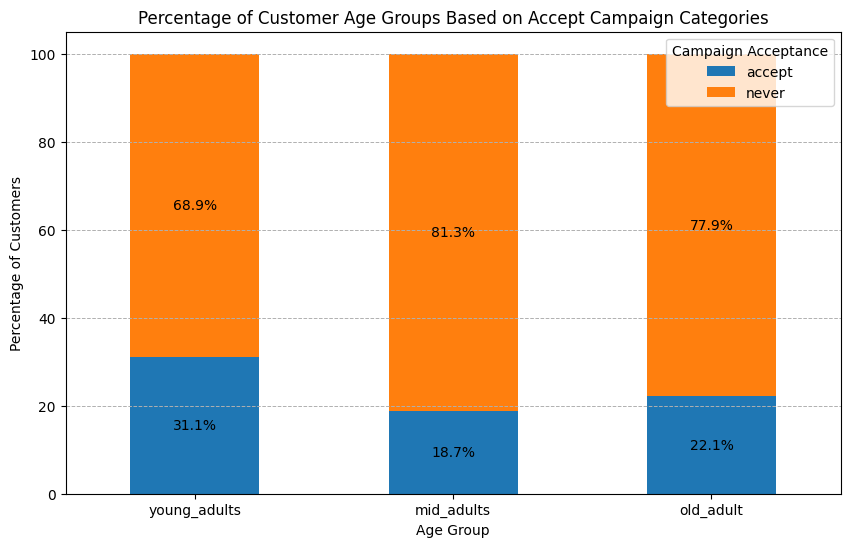

In [68]:
# Load the dataset from CSV
new_filepath_2 = 'C:\\capstoneproject2\\updated_dataset_2.csv'
df = pd.read_csv(new_filepath_2)

# Add new column "customer_age"
df['customer_age'] = 2024 - df['Year_Birth']

# Group the customer_age into categories without the teenager category
age_bins = [21, 35, 55, float('inf')]
age_labels = ['young_adults', 'mid_adults', 'old_adult']
df['age_group'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels, right=False)

# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Create a pivot table for the bar graph
pivot_table = df.pivot_table(index='age_group', columns='accept_campaign', aggfunc='size', fill_value=0)

# Calculate percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the bar graph
ax = pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Customer Age Groups Based on Accept Campaign Categories')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Customers')
plt.legend(title='Campaign Acceptance')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add percentage labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            f'{height:.1f}%', 
            ha='center', 
            va='center')

# Save the plot to a file
plt.savefig('age_group_campaign_acceptance_percentage.png')

# Display the plot
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\756631023.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_accept = df_accept.pivot_table(index='age_group', columns='Campaign', aggfunc='size', fill_value=0)
C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\756631023.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_not_accept = df_not_accept.pivot_table(index='age_group', columns='Campaign', aggfunc='size', fill_value=0)


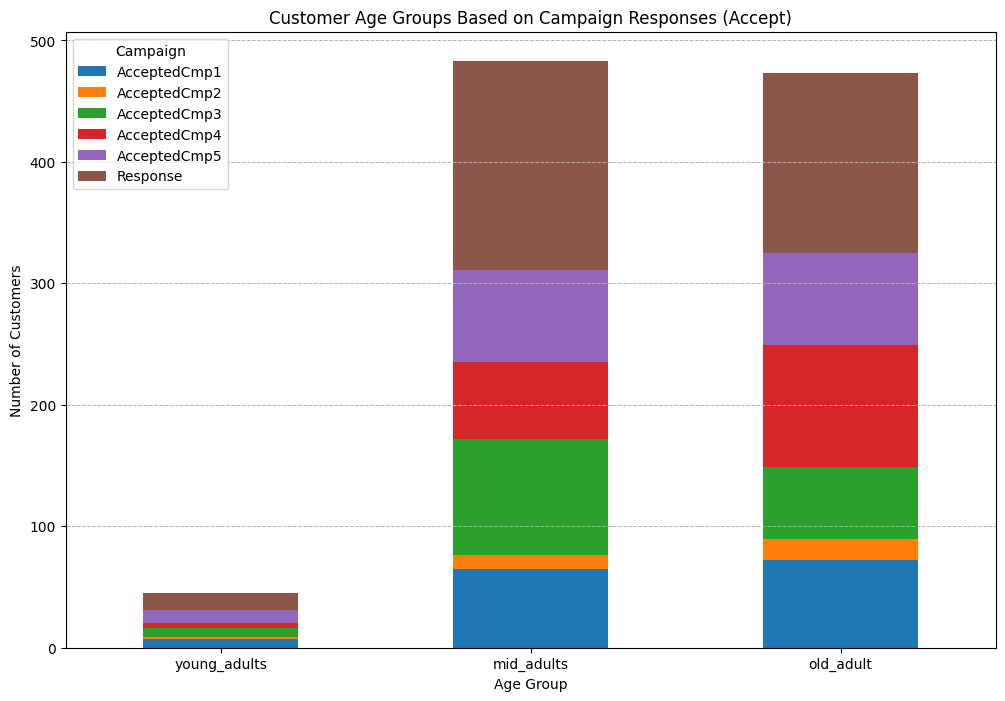

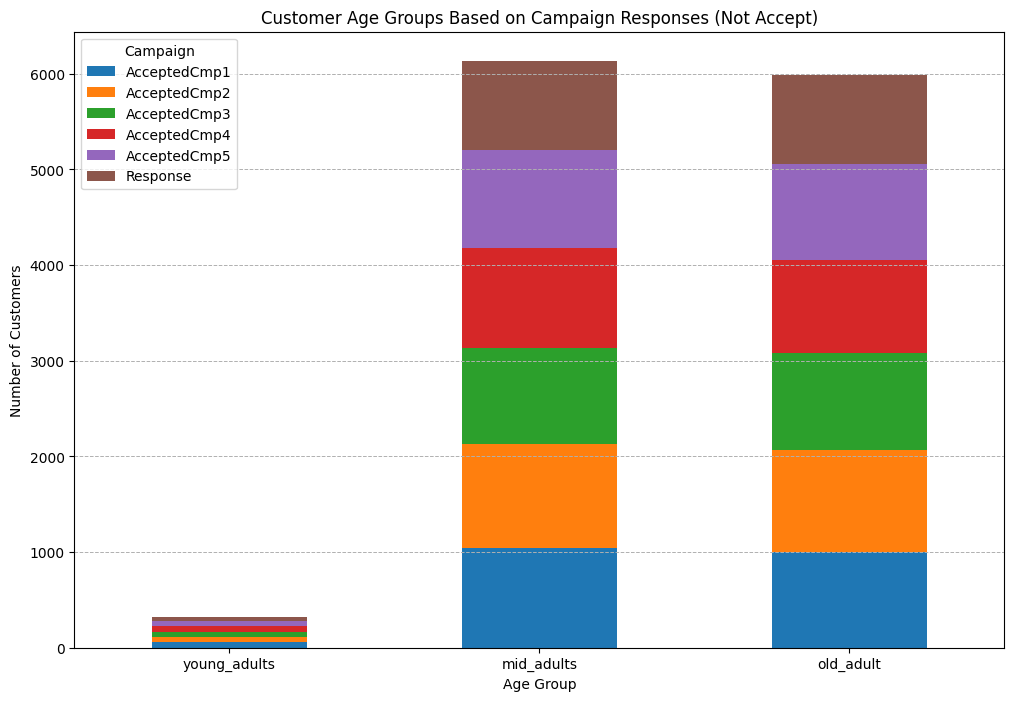

In [69]:
# Melt the DataFrame to have one column for campaign types and one for response
df_melted = df.melt(id_vars=['age_group'], 
                    value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], 
                    var_name='Campaign', 
                    value_name='Response_Value')

# Map the values to 'not accept' and 'accept'
df_melted['Response_Value'] = df_melted['Response_Value'].map({0: 'not accept', 1: 'accept'})

# Create separate DataFrames for 'accept' and 'not accept'
df_accept = df_melted[df_melted['Response_Value'] == 'accept']
df_not_accept = df_melted[df_melted['Response_Value'] == 'not accept']

# Create pivot tables for the bar graphs
pivot_table_accept = df_accept.pivot_table(index='age_group', columns='Campaign', aggfunc='size', fill_value=0)
pivot_table_not_accept = df_not_accept.pivot_table(index='age_group', columns='Campaign', aggfunc='size', fill_value=0)

# Plot the 'accept' bar graph
pivot_table_accept.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Customer Age Groups Based on Campaign Responses (Accept)')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.savefig('age_group_campaign_responses_accept.png')
plt.show()

# Plot the 'not accept' bar graph
pivot_table_not_accept.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Customer Age Groups Based on Campaign Responses (Not Accept)')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.savefig('age_group_campaign_responses_not_accept.png')
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\3304669364.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_accept = df_accept.pivot_table(index='age_group', columns='Campaign', aggfunc='size', fill_value=0)
C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\3304669364.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_not_accept = df_not_accept.pivot_table(index='age_group', columns='Campaign', aggfunc='size', fill_value=0)


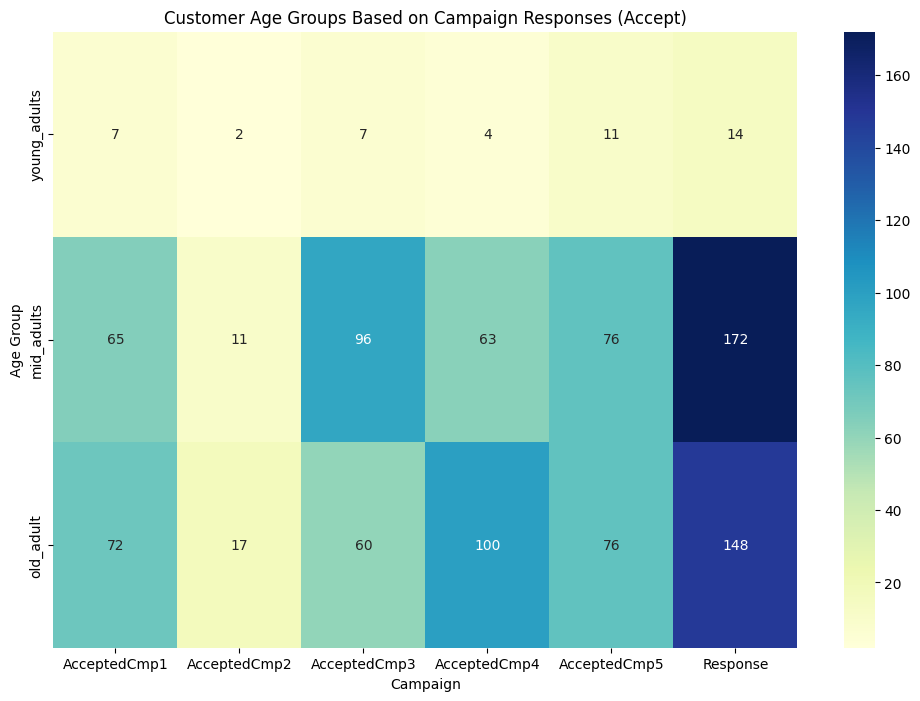

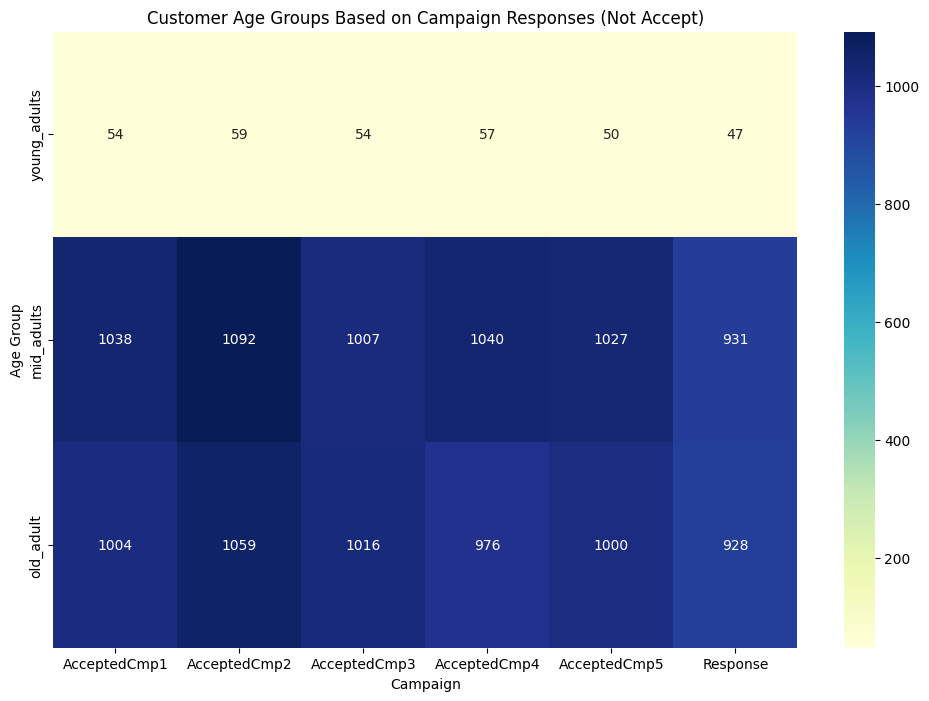

In [70]:
# Melt the DataFrame to have one column for campaign types and one for response
df_melted = df.melt(id_vars=['age_group'], 
                    value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], 
                    var_name='Campaign', 
                    value_name='Response_Value')

# Map the values to 'not accept' and 'accept'
df_melted['Response_Value'] = df_melted['Response_Value'].map({0: 'not accept', 1: 'accept'})

# Create separate DataFrames for 'accept' and 'not accept'
df_accept = df_melted[df_melted['Response_Value'] == 'accept']
df_not_accept = df_melted[df_melted['Response_Value'] == 'not accept']

# Create pivot tables for the heatmaps
pivot_table_accept = df_accept.pivot_table(index='age_group', columns='Campaign', aggfunc='size', fill_value=0)
pivot_table_not_accept = df_not_accept.pivot_table(index='age_group', columns='Campaign', aggfunc='size', fill_value=0)

# Plot the 'accept' heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_accept, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Age Groups Based on Campaign Responses (Accept)')
plt.xlabel('Campaign')
plt.ylabel('Age Group')
plt.savefig('age_group_campaign_responses_accept_heatmap.png')
plt.show()

# Plot the 'not accept' heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_not_accept, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Age Groups Based on Campaign Responses (Not Accept)')
plt.xlabel('Campaign')
plt.ylabel('Age Group')
plt.savefig('age_group_campaign_responses_not_accept_heatmap.png')
plt.show()

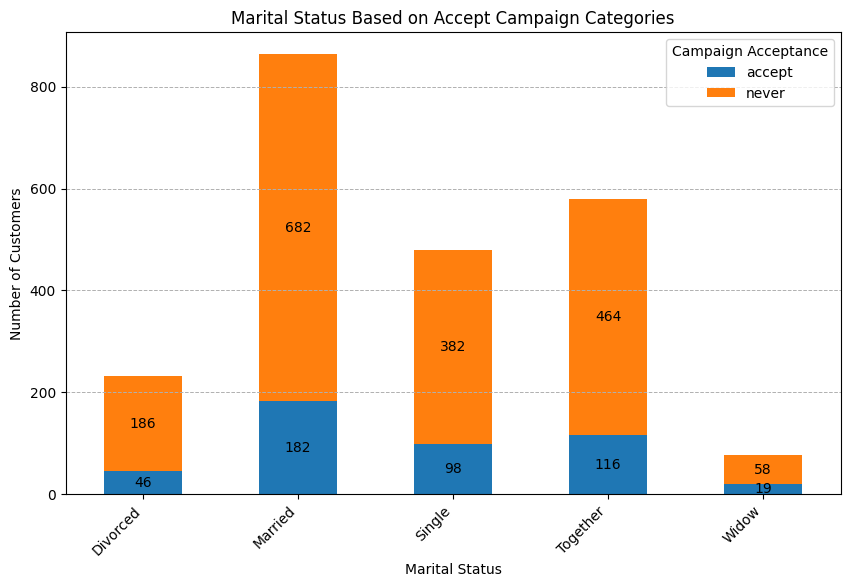

In [71]:
# Drop the 'Absurd', 'Alone', and 'YOLO' statuses
df = df[~df['Marital_Status'].isin(['Absurd', 'Alone', 'YOLO'])]

# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Group by Marital_Status and accept_campaign
grouped = df.groupby(['Marital_Status', 'accept_campaign']).size().unstack(fill_value=0)

# Plot the bar graph
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Marital Status Based on Accept Campaign Categories')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign Acceptance')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add labels to bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            f'{int(height)}', 
            ha='center', 
            va='center')

# Save the plot to a file
plt.savefig('marital_status_campaign_acceptance.png')

# Display the plot
plt.show()

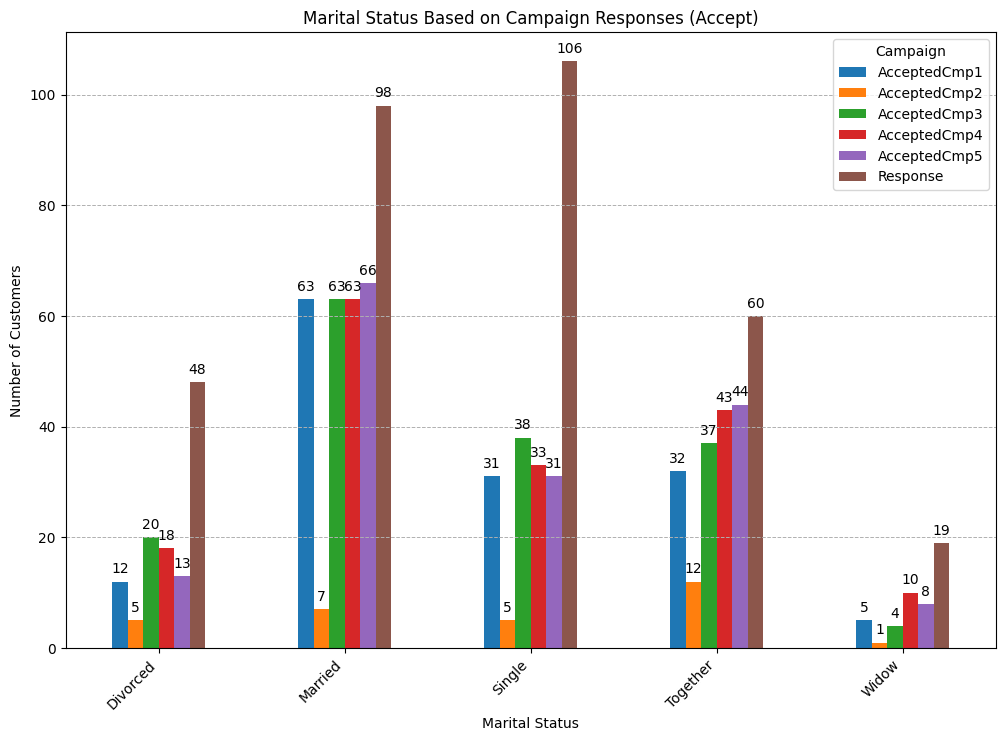

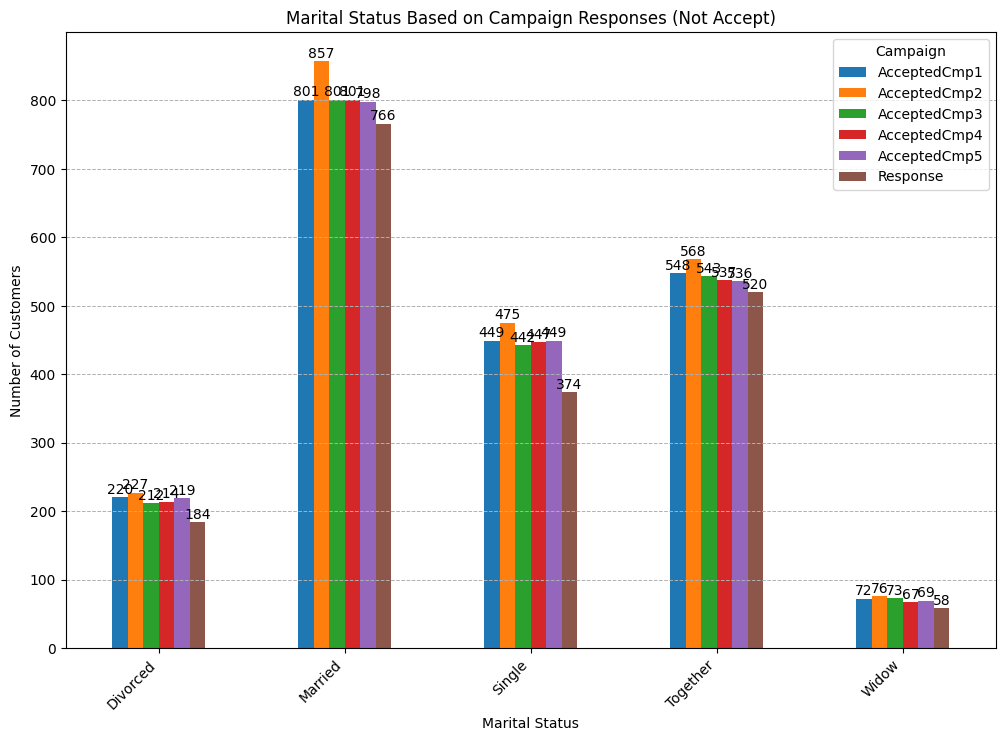

In [72]:
# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Melt the DataFrame to have one column for campaign types and one for response
df_melted = df.melt(id_vars=['Marital_Status'], 
                    value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], 
                    var_name='Campaign', 
                    value_name='Response_Value')

# Map the values to 'not accept' and 'accept'
df_melted['Response_Value'] = df_melted['Response_Value'].map({0: 'not accept', 1: 'accept'})

# Create separate DataFrames for 'accept' and 'not accept'
df_accept = df_melted[df_melted['Response_Value'] == 'accept']
df_not_accept = df_melted[df_melted['Response_Value'] == 'not accept']

# Create pivot tables for the bar graphs
pivot_table_accept = df_accept.pivot_table(index='Marital_Status', columns='Campaign', aggfunc='size', fill_value=0)
pivot_table_not_accept = df_not_accept.pivot_table(index='Marital_Status', columns='Campaign', aggfunc='size', fill_value=0)

# Function to add labels to bars
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only add labels for non-zero heights
            ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

# Plot the 'accept' bar graph
ax = pivot_table_accept.plot(kind='bar', figsize=(12, 8))
plt.title('Marital Status Based on Campaign Responses (Accept)')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
add_labels(ax)
plt.savefig('marital_status_campaign_responses_accept.png')
plt.show()

# Plot the 'not accept' bar graph
ax = pivot_table_not_accept.plot(kind='bar', figsize=(12, 8))
plt.title('Marital Status Based on Campaign Responses (Not Accept)')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
add_labels(ax)
plt.savefig('marital_status_campaign_responses_not_accept.png')
plt.show()

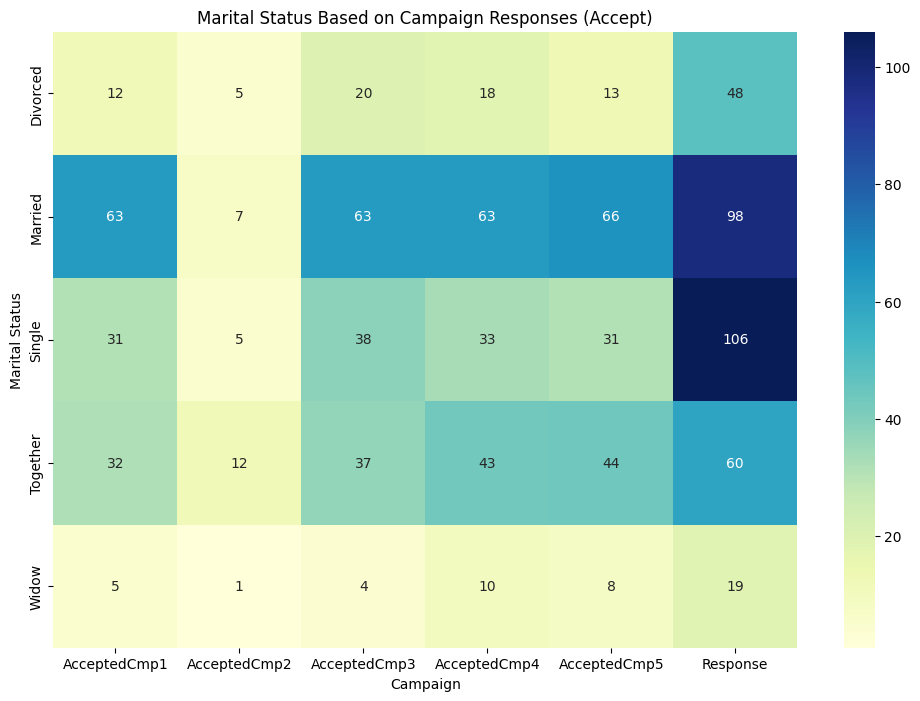

In [73]:
# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Melt the DataFrame to have one column for campaign types and one for response
df_melted = df.melt(id_vars=['Marital_Status'], 
                    value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], 
                    var_name='Campaign', 
                    value_name='Response_Value')

# Map the values to 'not accept' and 'accept'
df_melted['Response_Value'] = df_melted['Response_Value'].map({0: 'not accept', 1: 'accept'})

# Create separate DataFrames for 'accept' and 'not accept'
df_accept = df_melted[df_melted['Response_Value'] == 'accept']
df_not_accept = df_melted[df_melted['Response_Value'] == 'not accept']

# Create pivot tables for the heatmaps
pivot_table_accept = df_accept.pivot_table(index='Marital_Status', columns='Campaign', aggfunc='size', fill_value=0)
pivot_table_not_accept = df_not_accept.pivot_table(index='Marital_Status', columns='Campaign', aggfunc='size', fill_value=0)

# Plot the 'accept' heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_accept, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Marital Status Based on Campaign Responses (Accept)')
plt.xlabel('Campaign')
plt.ylabel('Marital Status')
plt.savefig('marital_status')

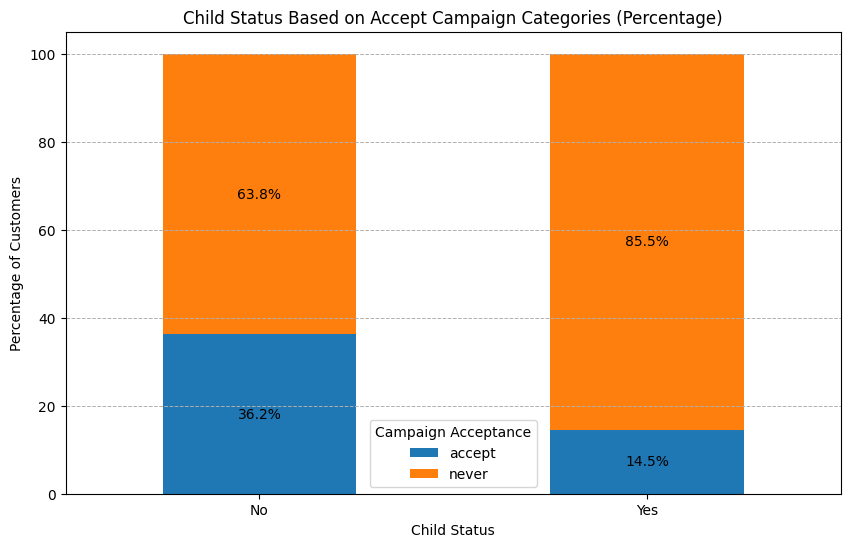

In [74]:
# Load the dataset from CSV
new_filepath_2 = 'C:\\capstoneproject2\\updated_dataset_2.csv'
df = pd.read_csv(new_filepath_2)

# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Group by has_child and accept_campaign
grouped = df.groupby(['has_child', 'accept_campaign']).size().unstack(fill_value=0)

# Calculate percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the bar graph
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Child Status Based on Accept Campaign Categories (Percentage)')
plt.xlabel('Child Status')
plt.ylabel('Percentage of Customers')
plt.legend(title='Campaign Acceptance')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add percentage labels to bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            f'{height:.1f}%', 
            ha='center', 
            va='center')

# Save the plot to a file
plt.savefig('child_status_campaign_acceptance_percentage.png')

# Display the plot
plt.show()

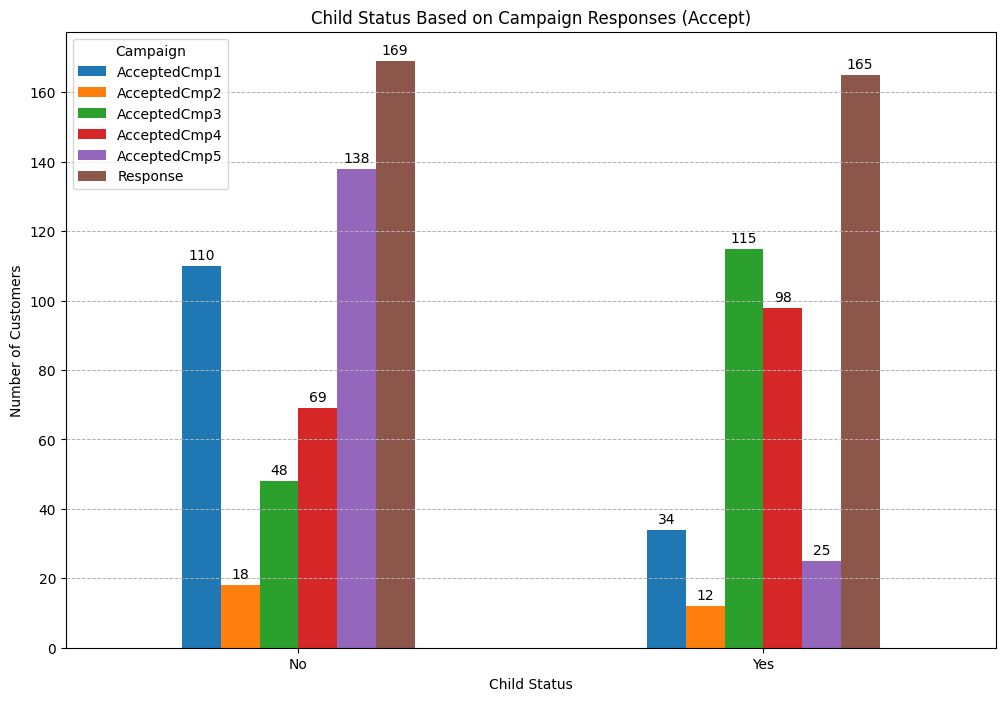

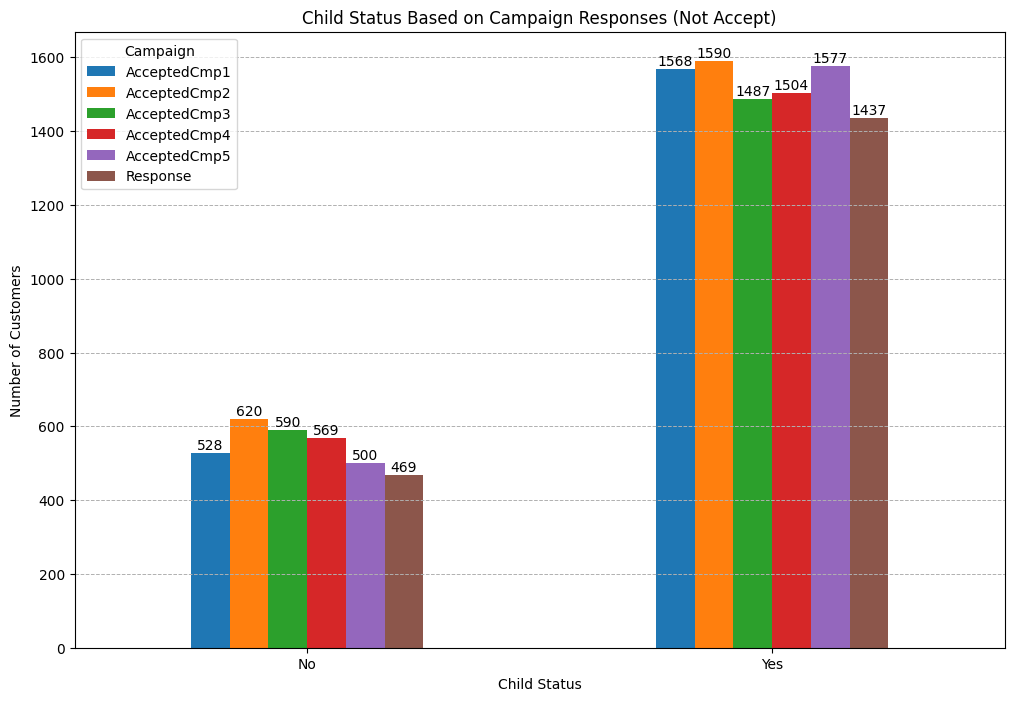

In [75]:
# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Melt the DataFrame to have one column for campaign types and one for response
df_melted = df.melt(id_vars=['has_child'], 
                    value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], 
                    var_name='Campaign', 
                    value_name='Response_Value')

# Map the values to 'not accept' and 'accept'
df_melted['Response_Value'] = df_melted['Response_Value'].map({0: 'not accept', 1: 'accept'})

# Create separate DataFrames for 'accept' and 'not accept'
df_accept = df_melted[df_melted['Response_Value'] == 'accept']
df_not_accept = df_melted[df_melted['Response_Value'] == 'not accept']

# Create pivot tables for the bar graphs
pivot_table_accept = df_accept.pivot_table(index='has_child', columns='Campaign', aggfunc='size', fill_value=0)
pivot_table_not_accept = df_not_accept.pivot_table(index='has_child', columns='Campaign', aggfunc='size', fill_value=0)

# Function to add labels to bars
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only add labels for non-zero heights
            ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

# Plot the 'accept' bar graph
ax = pivot_table_accept.plot(kind='bar', figsize=(12, 8))
plt.title('Child Status Based on Campaign Responses (Accept)')
plt.xlabel('Child Status')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
add_labels(ax)
plt.savefig('child_status_campaign_responses_accept.png')
plt.show()

# Plot the 'not accept' bar graph
ax = pivot_table_not_accept.plot(kind='bar', figsize=(12, 8))
plt.title('Child Status Based on Campaign Responses (Not Accept)')
plt.xlabel('Child Status')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
add_labels(ax)
plt.savefig('child_status_campaign_responses_not_accept.png')
plt.show()

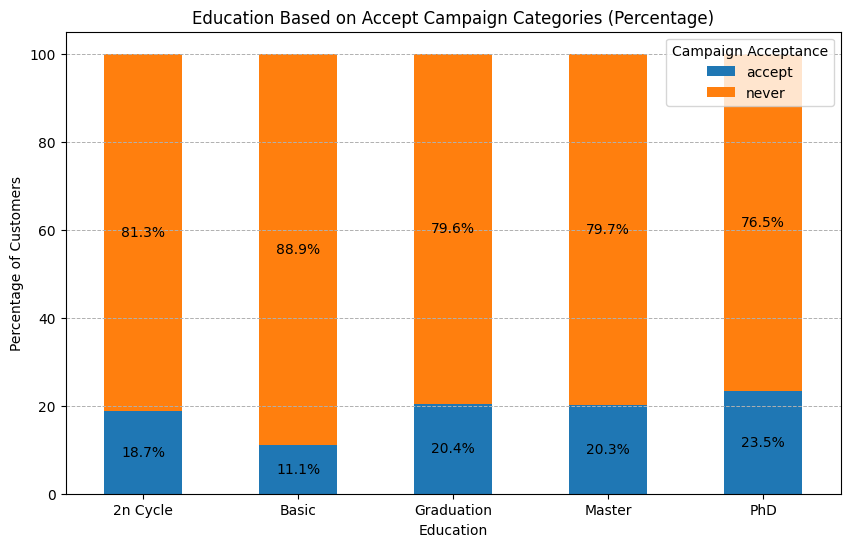

In [76]:
# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Group by Education and accept_campaign
grouped = df.groupby(['Education', 'accept_campaign']).size().unstack(fill_value=0)

# Calculate percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the bar graph
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Based on Accept Campaign Categories (Percentage)')
plt.xlabel('Education')
plt.ylabel('Percentage of Customers')
plt.legend(title='Campaign Acceptance')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add percentage labels to bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            f'{height:.1f}%', 
            ha='center', 
            va='center')

# Save the plot to a file
plt.savefig('education_campaign_acceptance_percentage.png')

# Display the plot
plt.show()

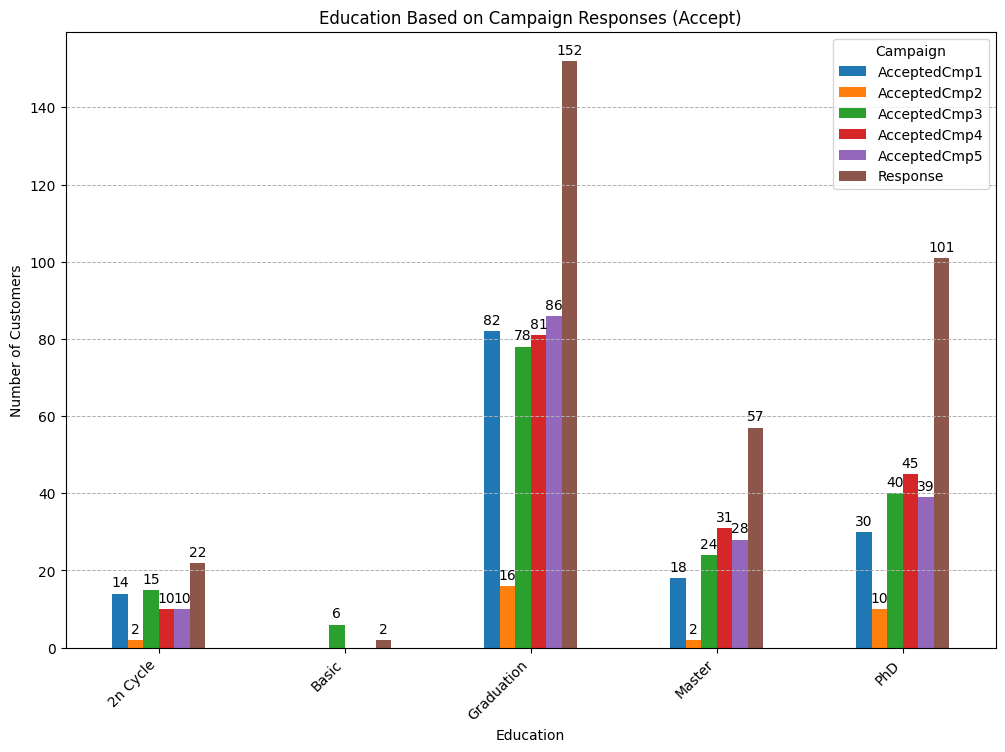

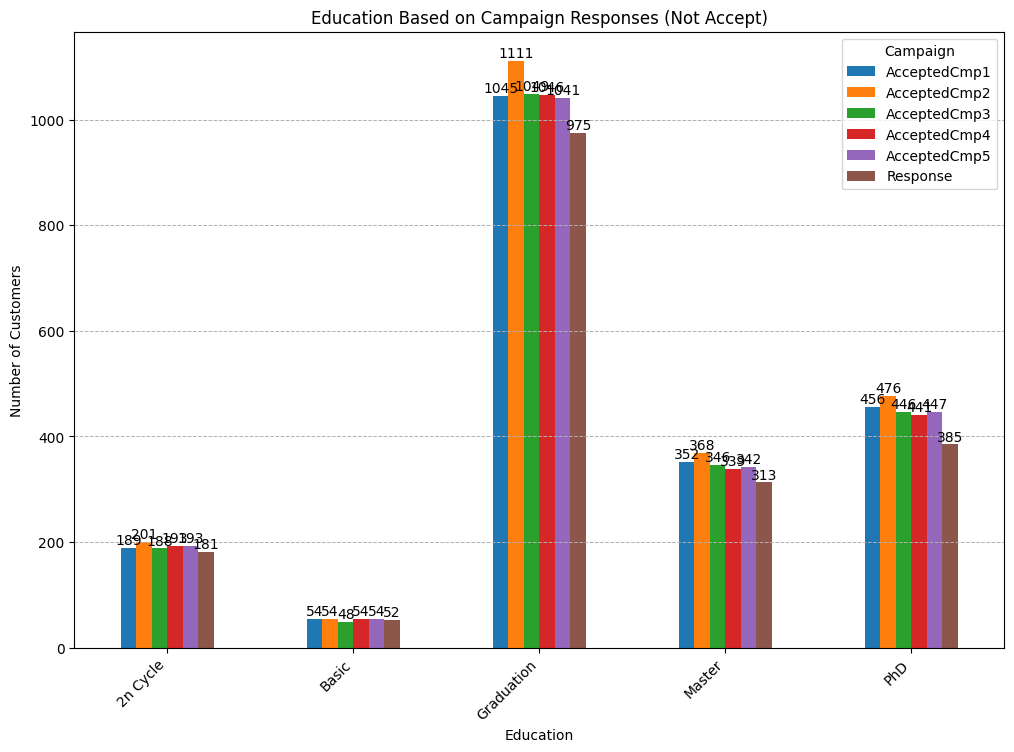

In [77]:
# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Melt the DataFrame to have one column for campaign types and one for response
df_melted = df.melt(id_vars=['Education'], 
                    value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], 
                    var_name='Campaign', 
                    value_name='Response_Value')

# Map the values to 'not accept' and 'accept'
df_melted['Response_Value'] = df_melted['Response_Value'].map({0: 'not accept', 1: 'accept'})

# Create separate DataFrames for 'accept' and 'not accept'
df_accept = df_melted[df_melted['Response_Value'] == 'accept']
df_not_accept = df_melted[df_melted['Response_Value'] == 'not accept']

# Create pivot tables for the bar graphs
pivot_table_accept = df_accept.pivot_table(index='Education', columns='Campaign', aggfunc='size', fill_value=0)
pivot_table_not_accept = df_not_accept.pivot_table(index='Education', columns='Campaign', aggfunc='size', fill_value=0)

# Function to add labels to bars
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only add labels for non-zero heights
            ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

# Plot the 'accept' bar graph
ax = pivot_table_accept.plot(kind='bar', figsize=(12, 8))
plt.title('Education Based on Campaign Responses (Accept)')
plt.xlabel('Education')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
add_labels(ax)
plt.savefig('education_campaign_responses_accept.png')
plt.show()

# Plot the 'not accept' bar graph
ax = pivot_table_not_accept.plot(kind='bar', figsize=(12, 8))
plt.title('Education Based on Campaign Responses (Not Accept)')
plt.xlabel('Education')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
add_labels(ax)
plt.savefig('education_campaign_responses_not_accept.png')
plt.show()

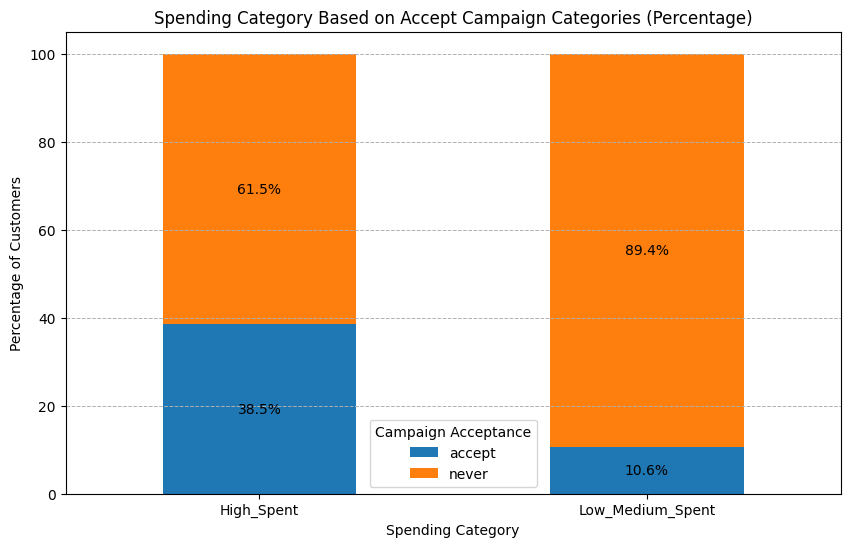

In [78]:
# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Group by spent_category and accept_campaign
grouped = df.groupby(['spent_category', 'accept_campaign']).size().unstack(fill_value=0)

# Calculate percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the bar graph
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Spending Category Based on Accept Campaign Categories (Percentage)')
plt.xlabel('Spending Category')
plt.ylabel('Percentage of Customers')
plt.legend(title='Campaign Acceptance')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add percentage labels to bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            f'{height:.1f}%', 
            ha='center', 
            va='center')

# Save the plot to a file
plt.savefig('spent_category_campaign_acceptance_percentage.png')

# Display the plot
plt.show()

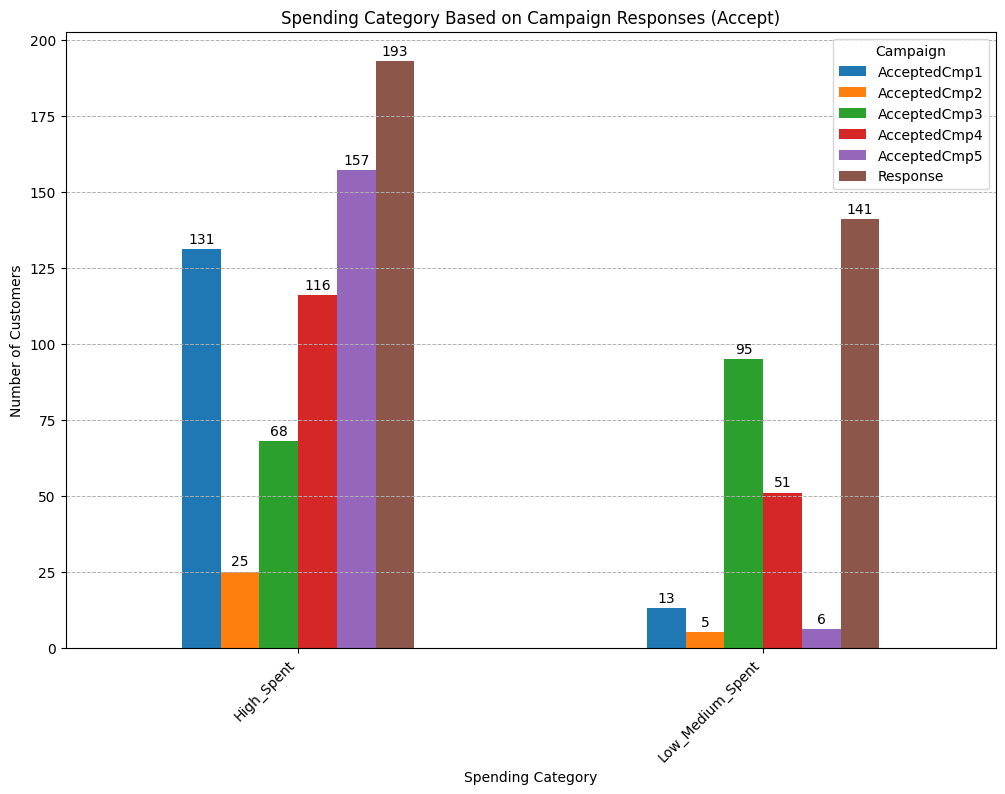

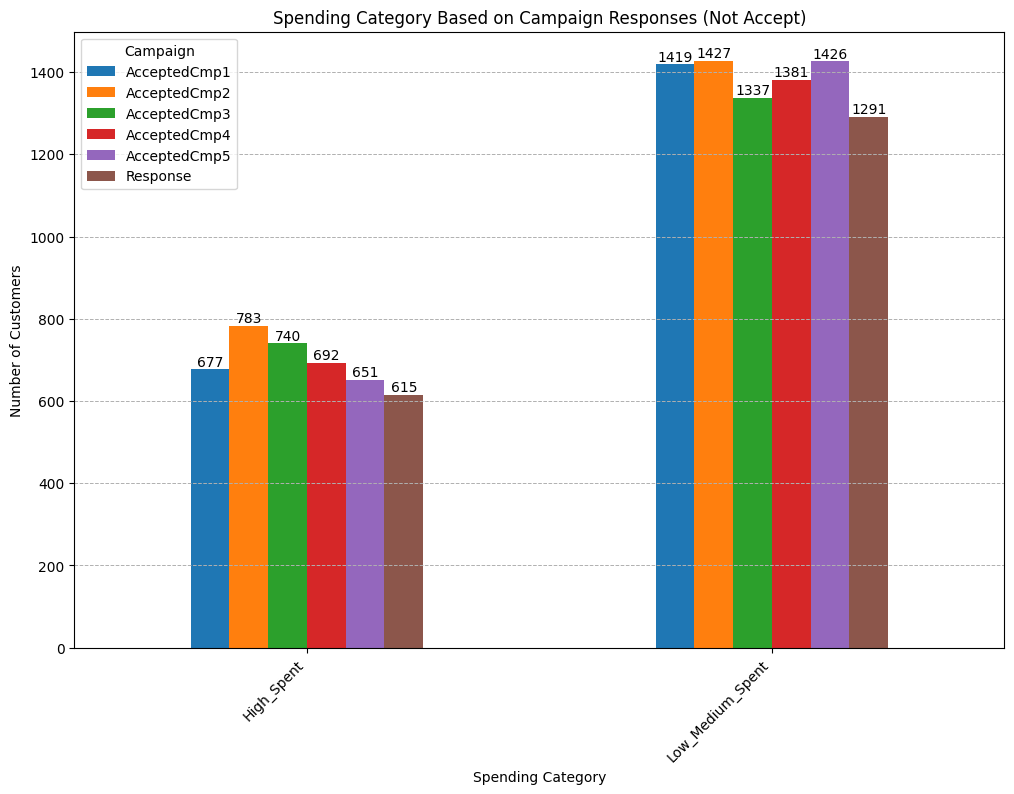

In [79]:
# Combine 'AcceptedCmp' columns into the 'promotion' column
df['promotion'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Create new column 'accept_campaign'
df['accept_campaign'] = df['promotion'].apply(lambda x: 'accept' if x > 0 else 'never')

# Melt the DataFrame to have one column for campaign types and one for response
df_melted = df.melt(id_vars=['spent_category'], 
                    value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], 
                    var_name='Campaign', 
                    value_name='Response_Value')

# Map the values to 'not accept' and 'accept'
df_melted['Response_Value'] = df_melted['Response_Value'].map({0: 'not accept', 1: 'accept'})

# Create separate DataFrames for 'accept' and 'not accept'
df_accept = df_melted[df_melted['Response_Value'] == 'accept']
df_not_accept = df_melted[df_melted['Response_Value'] == 'not accept']

# Create pivot tables for the bar graphs
pivot_table_accept = df_accept.pivot_table(index='spent_category', columns='Campaign', aggfunc='size', fill_value=0)
pivot_table_not_accept = df_not_accept.pivot_table(index='spent_category', columns='Campaign', aggfunc='size', fill_value=0)

# Function to add labels to bars
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only add labels for non-zero heights
            ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

# Plot the 'accept' bar graph
ax = pivot_table_accept.plot(kind='bar', figsize=(12, 8))
plt.title('Spending Category Based on Campaign Responses (Accept)')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
add_labels(ax)
plt.savefig('spent_category_campaign_responses_accept.png')
plt.show()

# Plot the 'not accept' bar graph
ax = pivot_table_not_accept.plot(kind='bar', figsize=(12, 8))
plt.title('Spending Category Based on Campaign Responses (Not Accept)')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
add_labels(ax)
plt.savefig('spent_category_campaign_responses_not_accept.png')
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\2906761167.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')


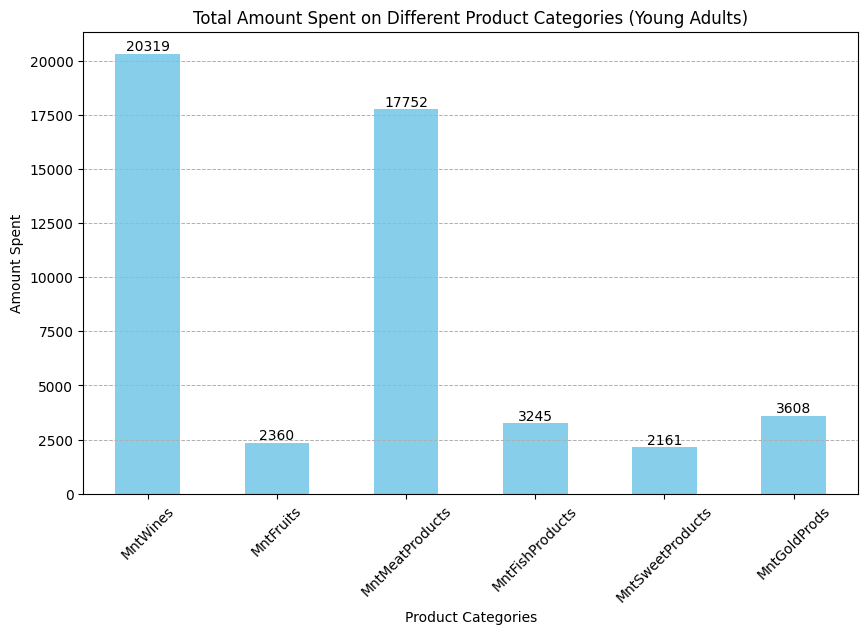

In [80]:
# Add new column "customer_age"
df['customer_age'] = 2024 - df['Year_Birth']

# Group the customer_age into categories without the teenager category
age_bins = [21, 35, 55, float('inf')]
age_labels = ['young_adults', 'mid_adults', 'old_adult']
df['age_group'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels, right=False)

# Filter the dataset based on the specified age group
filtered_df = df[df['age_group'] == 'young_adults']

# Calculate the total amount spent on different product categories
breakdown = filtered_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
breakdown.plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent on Different Product Categories (Young Adults)')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add labels to bars
for i in range(len(breakdown)):
    plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')

# Save the plot to a file
plt.savefig('young_adults_spent_breakdown.png')

# Display the plot
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\904751513.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')


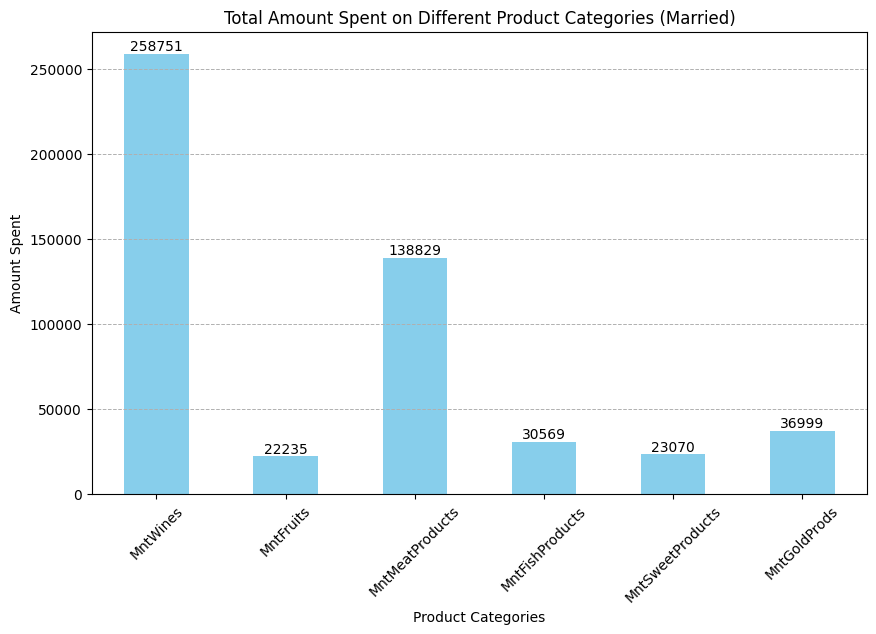

In [81]:
# Filter the dataset based on the specified marital status
filtered_df = df[df['Marital_Status'] == 'Married']

# Calculate the total amount spent on different product categories
breakdown = filtered_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
breakdown.plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent on Different Product Categories (Married)')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add labels to bars
for i in range(len(breakdown)):
    plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')

# Save the plot to a file
plt.savefig('married_spent_breakdown.png')

# Display the plot
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\1295797219.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')


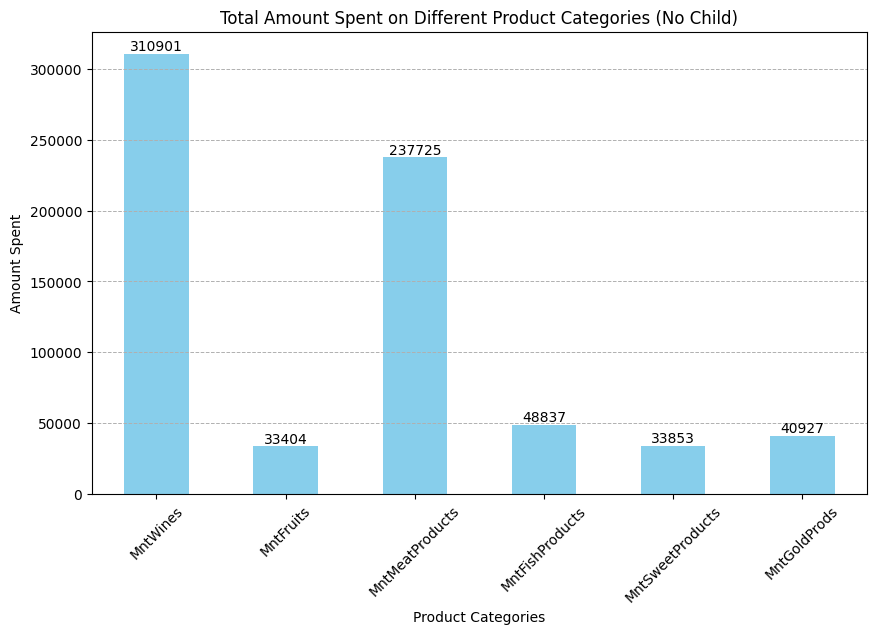

In [82]:
# Filter the dataset based on the specified child status
filtered_df = df[df['has_child'] == 'No']

# Calculate the total amount spent on different product categories
breakdown = filtered_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
breakdown.plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent on Different Product Categories (No Child)')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add labels to bars
for i in range(len(breakdown)):
    plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')

# Save the plot to a file
plt.savefig('no_child_spent_breakdown.png')

# Display the plot
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\4083656156.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')


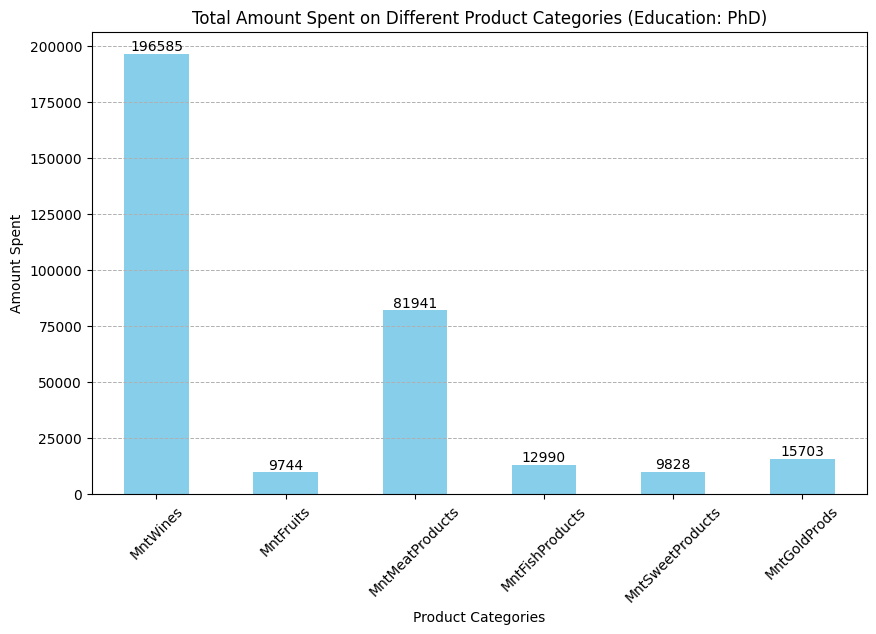

In [83]:
# Filter the dataset based on the specified education level
filtered_df = df[df['Education'] == 'PhD']

# Calculate the total amount spent on different product categories
breakdown = filtered_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
breakdown.plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent on Different Product Categories (Education: PhD)')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add labels to bars
for i in range(len(breakdown)):
    plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')

# Save the plot to a file
plt.savefig('phd_education_spent_breakdown.png')

# Display the plot
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\3342104795.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')


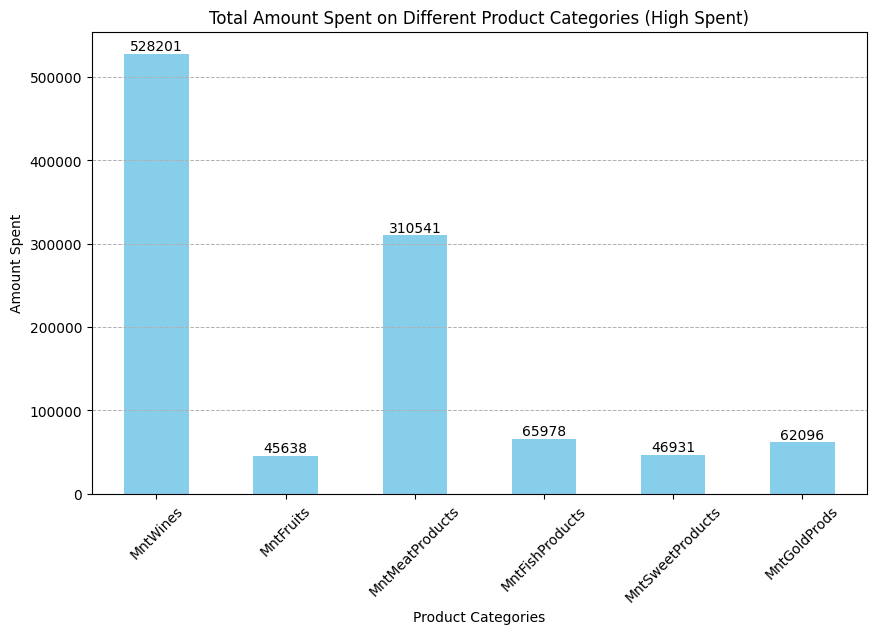

In [84]:
# Filter the dataset based on the specified spent category
filtered_df = df[df['spent_category'] == 'High_Spent']

# Calculate the total amount spent on different product categories
breakdown = filtered_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
breakdown.plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent on Different Product Categories (High Spent)')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add labels to bars
for i in range(len(breakdown)):
    plt.text(i, breakdown[i] + 1, f'{breakdown[i]:.0f}', ha='center', va='bottom')

# Save the plot to a file
plt.savefig('high_spent_breakdown.png')

# Display the plot
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_10960\2196234494.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, total_purchases[i] + 1, f'{total_purchases[i]:.0f}', ha='center', va='bottom')


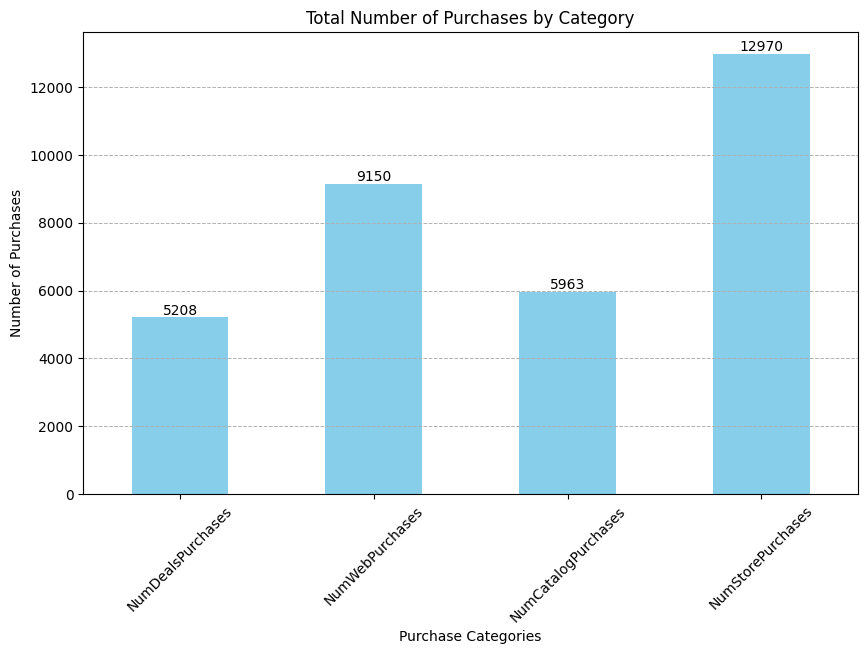

In [85]:
# Calculate the total number of purchases for each category
total_purchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
total_purchases.plot(kind='bar', color='skyblue')
plt.title('Total Number of Purchases by Category')
plt.xlabel('Purchase Categories')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Add labels to bars
for i in range(len(total_purchases)):
    plt.text(i, total_purchases[i] + 1, f'{total_purchases[i]:.0f}', ha='center', va='bottom')

# Save the plot to a file
plt.savefig('total_purchases_breakdown.png')

# Display the plot
plt.show()